### Import libraries

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import sklearn
print(sklearn.__version__)

/kaggle/input/housing-prices-dataset/Housing.csv
1.2.2


### Import the [dataset](www.kaggle.com/datasets/yasserh/housing-prices-dataset/versions/1)

In [3]:
filepath = "/kaggle/input/housing-prices-dataset/Housing.csv"
old_df = pd.read_csv(filepath)
df = pd.read_csv(filepath)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Transformation

In [4]:
df = pd.read_csv(filepath)
colums = ["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for i in colums:
    df[i] = df[i].astype(str).str.strip().str.lower()
    df[i] = df[i].map({"yes": 1, "no": 0})

df["furnishingstatus"] = df["furnishingstatus"].astype(str).str.lower()
df["furnishingstatus"] = df["furnishingstatus"].map({"unfurnished": 0, "semi-furnished": 1, "furnished":2})
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


### Comparision previous vs. new dataset

In [5]:
old_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [6]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1


### Divide the dataset into train and test

In [8]:
from sklearn.model_selection import train_test_split
features = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom","basement","hotwaterheating","airconditioning","parking", "prefarea","furnishingstatus"]
x = df[features]
y = df["price"]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

### Find the best parameters through Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


param = {
    "n_estimators": [50, 100, 200],             
    "criterion": ["squared_error", "absolute_error"],  
    "max_depth": [5, 10, 20, None],               
    "min_samples_split": [2, 5, 10],              
    "min_samples_leaf": [1, 2, 4],               
    "max_features": ["sqrt", "log2", None],  
    "max_leaf_nodes": [None, 10, 20, 50]         
}


grid = GridSearchCV(model, param_grid = param, scoring = "r2", n_jobs = 1, cv = 5, return_train_score = True, verbose = 3)
grid.fit(x_train,y_train)
best_params = grid.best_params_
best_score = grid.best_score_


Run this code if the search is taking too long:

In [9]:
best_params = {'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 
best_score = 0.638484322621151

### Values of the best parameters

In [10]:
print(best_params)
print(best_score)

{'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.638484322621151


### Define and train the model

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(**best_params, random_state = 42, n_jobs = -1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluation of the model

In [13]:
from sklearn.metrics import mean_absolute_error,r2_score, median_absolute_error
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))
print("R2 Score: " + str(r2_score(y_test,y_pred)))
print("Median Absolute Error: " + str(median_absolute_error(y_test,y_pred)))

Mean Absolute Error: 939985.4176829269
R2 Score: 0.61134339703448
Median Absolute Error: 737698.5


### Visualization of a single Decision Tree of the Random Forest Walk

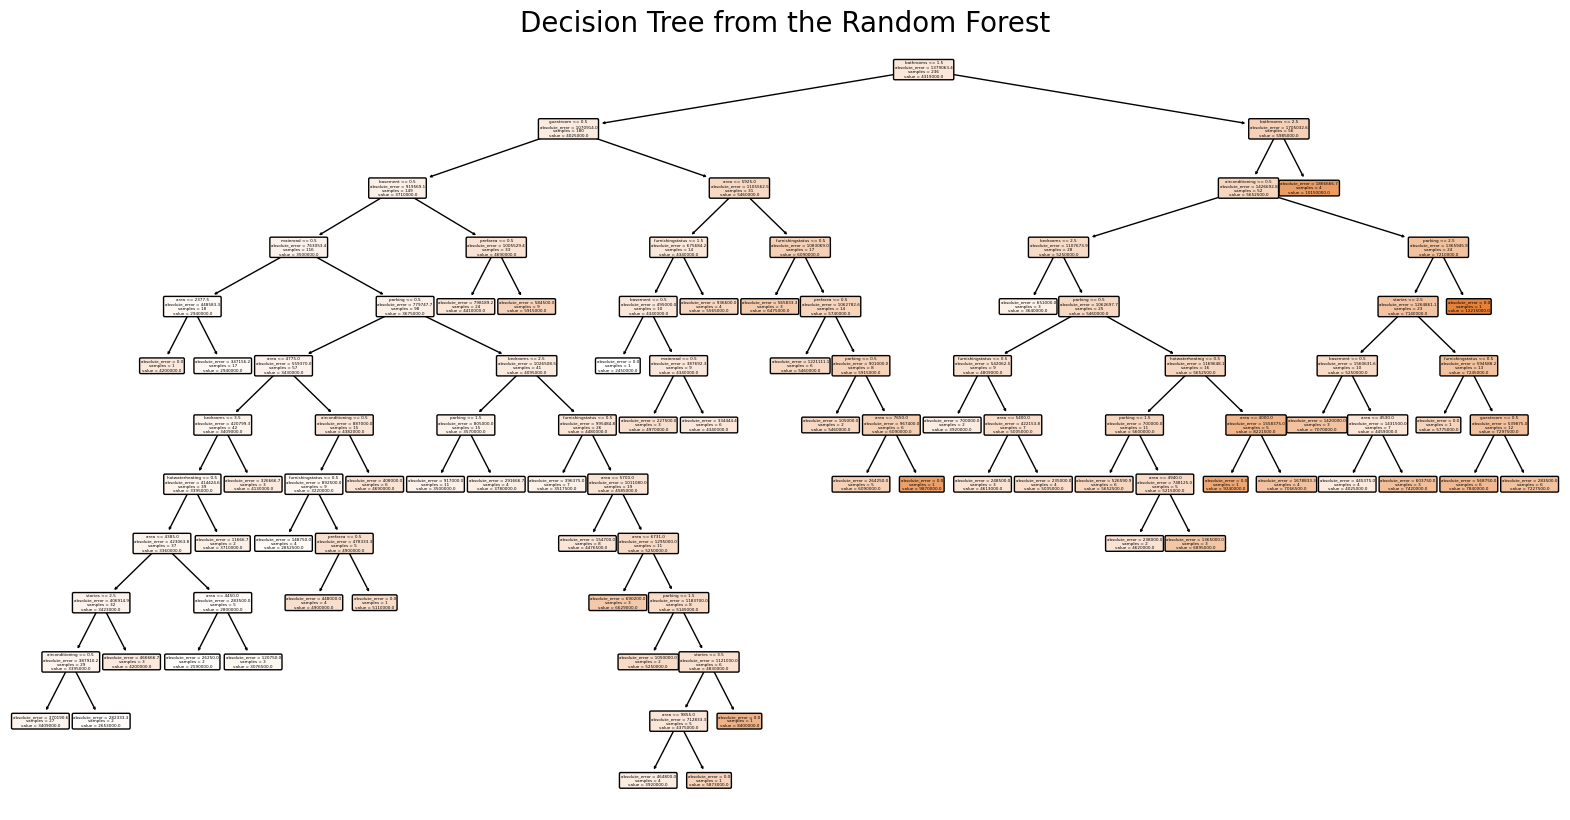

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
                   
plot_tree(estimator, 
          feature_names=x.columns,  
          filled=True,             
          rounded=True,
         class_names = True,
          precision = 1
) 

plt.title("Decision Tree from the Random Forest", fontsize = 20)
plt.show()

The first 3 rows of the Decision Tree

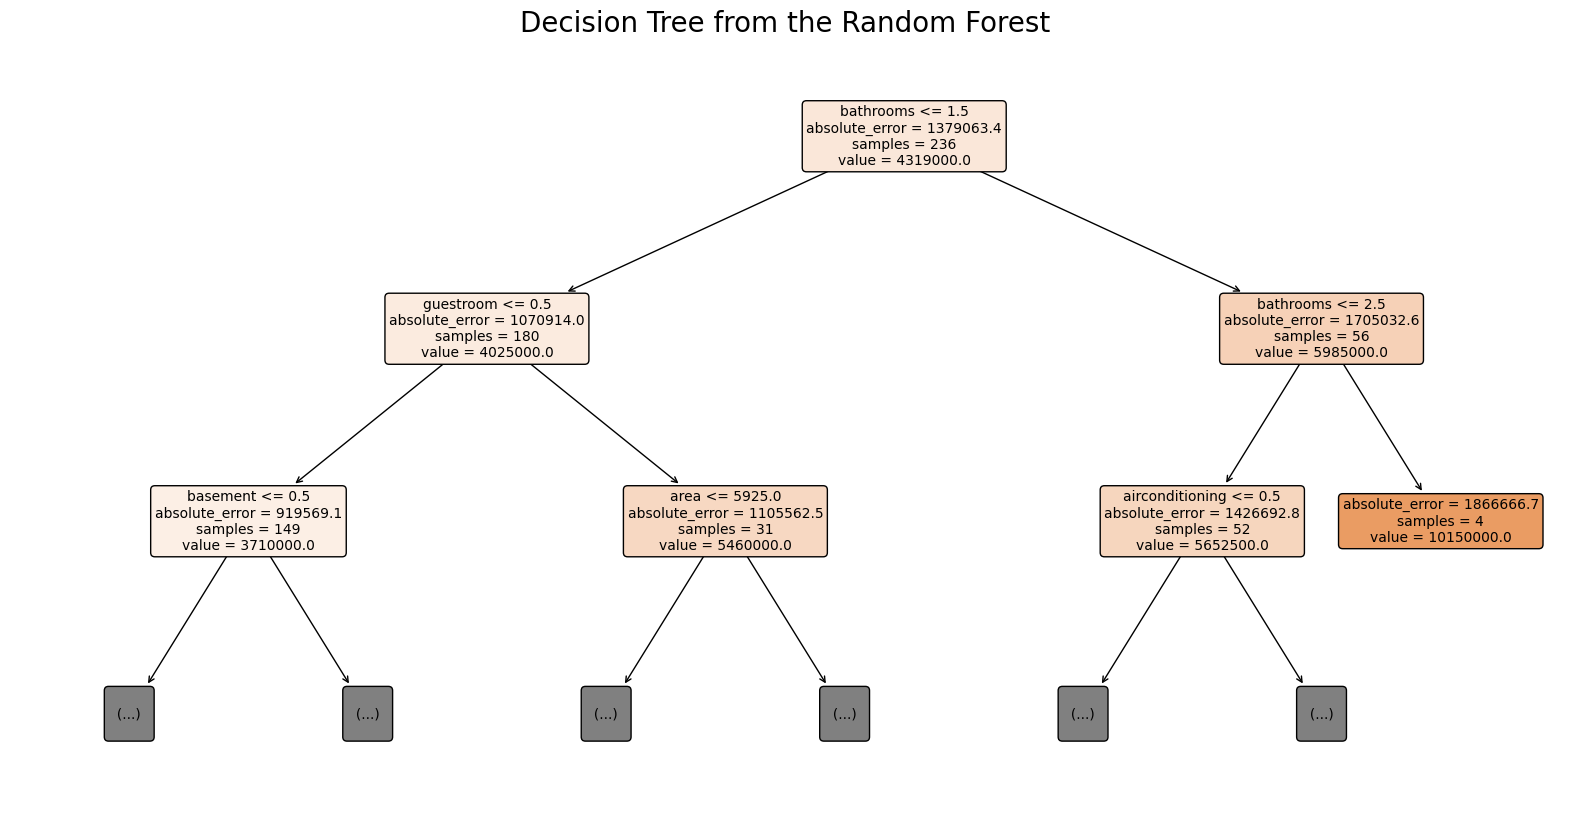

In [15]:
plt.figure(figsize=(20, 10))
                   
plot_tree(estimator, 
          feature_names=x.columns, 
          filled=True,             
          rounded=True,
         fontsize = 10,
         max_depth = 2,
         class_names = True,
          precision = 1
) 

plt.title("Decision Tree from the Random Forest", fontsize = 20)
plt.show()
